<a href="https://colab.research.google.com/github/Jane-Sim/findAnimal/blob/master/CNN_image_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#!git clone https://github.com/tensorflow/models.git
#!mv models "/content/drive/My Drive/app";
#!cd "/content/drive/My Drive/app"; pwd;
#!cd models

In [0]:
#!curl -O http://download.tensorflow.org/models/image/imagenet/inception-v3-2016-03-01.tar.gz
#!tar xzf inception-v3-2016-03-01.tar.gz
#!mv inception-v3 "/content/drive/My Drive/app/models";

In [0]:
import sys
sys.path.append('/content/drive/My Drive/app/models/research/inception')

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from inception.data import build_image_data
from inception import image_processing
from inception import inception_model as inception
from os import listdir
from os.path import isfile, join

import sys, os
#sys.argv = " --your flags --placed here".split(" ")
# Note the space at the beginning

In [0]:
checkpoint_dir = "/content/drive/My Drive/app/models/inception-v3"
batch_size = 100

In [0]:
my_image_path = "/content/drive/My Drive/app/pets/images/"
img_file_list = [f for f in listdir(my_image_path)  if (f.rfind('jpg') > -1)]
file_size = len(img_file_list)

#global_step = tf. Variable(0, trainable = False, name='global_step')
#saver = tf.train.Saver(tf.global_variables())

In [0]:
tf.app.flags.DEFINE_string('f', '', 'kernel')

In [0]:
def inference_on_image(img_path):
  with tf.Graph().as_default():
    num_classes = 1001

    coder = build_image_data.ImageCoder()

    image_buffer, _, _ =  build_image_data._process_image(img_path, coder)

    image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
    image = tf.expand_dims(image,0) # (299, 299,3) -> (1, 299, 299, 3)

    logits, _ = inception.inference(image, num_classes, for_training=False, restore_logits=True)

      
    with tf.Session() as tf_session:
      ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
      if ckpt and ckpt.model_checkpoint_path:
        if os.path.isabs(ckpt.model_checkpoint_path):
          # Restores from checkpoint with absolute path.
          saver.restore(tf_session, ckpt.model_checkpoint_path)
          # saver.restore(tf_session, "/tmp/train_back/model.ckpt-640")
        else:
          # Restores from checkpoint with relative path.
          saver.restore(tf_session, os.path.join(FLAGS.checkpoint_dir,
                                           ckpt.model_checkpoint_path))
      l = tf_session.run([logits])
      return l

In [10]:
def inference_on_multi_image():
  print("total image size {} ".format(file_size) )
  
  total_batch_size = file_size / batch_size + 1
  logit_list = []

  for n in range(int(total_batch_size)):
      print("step :{} / {}".format(n + 1, total_batch_size))
      mini_batch = img_file_list[n * batch_size: (n + 1) * batch_size]
      mini_adarr = np.ndarray(shape=(0, 299,299,3))
        
      with tf.Graph().as_default():
        num_classes = 1001 # (logit size)

        coder = build_image_data.ImageCoder()
        for i, image in enumerate(mini_batch):
          image_buffer, _, _ =  build_image_data._process_image(my_image_path + image, coder)
          image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
          image = tf.expand_dims(image, 0) # (299, 299,3) -> (1, 299, 299, 3)
          mini_adarr = tf.concat([mini_adarr, image], 0) 

        logits, _ = inception.inference(mini_adarr, num_classes, for_training=False, restore_logits=True)

        with tf.Session() as tf_session:
          ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
          if ckpt and ckpt.model_checkpoint_path:
            if os.path.isabs(ckpt.model_checkpoint_path):
              # Restores from checkpoint with absolute path.
              saver.restore(tf_session, ckpt.model_checkpoint_path)
              
            else:
              # Restores from checkpoint with relative path.
              saver.restore(tf_session, os.path.join(checkpoint_dir,
                                               ckpt.model_checkpoint_path))

          l = tf_session.run([logits])
          #saver.save(tf_session, '/content/drive/My Drive/app/models/cnn_model{[i]}.ckpt')
          for row in l[0]:
            logit_list.append(row)
                
  return logit_list


logit_list = inference_on_multi_image()

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/app/models/inception-v3/model.ckpt-157585


In [11]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(logit_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
def show_image(predictions):
    for i in predictions:
        print_image(my_image_path + img_file_list[i])

def print_image(path):
    plt.figure()
    im = mpimg.imread(path)
    plt.imshow(im)

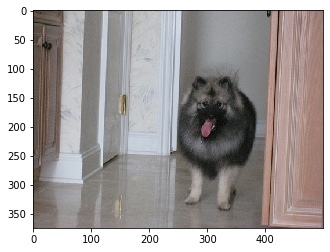

In [38]:
print_image(my_image_path + img_file_list[999])

In [36]:
example = np.array([logit_list[999]])
print(example)
predict = knn.kneighbors(example, return_distance=False)
print(predict)
## [[999 824 939 908 951 971 893 954 874 990 982]]

[[ 0.20403677 -1.0383247  -0.514686   ...  0.20241302 -0.48714626
   0.50855476]]
[[ 999  608 6909    0  837 1820 1855 5223 7361 5965]]


/content/drive/My Drive/app/pets/images/keeshond_86.jpg
/content/drive/My Drive/app/pets/images/keeshond_41.jpg
/content/drive/My Drive/app/pets/images/keeshond_109.jpg
/content/drive/My Drive/app/pets/images/keeshond_108.jpg
/content/drive/My Drive/app/pets/images/keeshond_95.jpg
/content/drive/My Drive/app/pets/images/keeshond_169.jpg
/content/drive/My Drive/app/pets/images/keeshond_171.jpg
/content/drive/My Drive/app/pets/images/keeshond_173.jpg
/content/drive/My Drive/app/pets/images/keeshond_151.jpg
/content/drive/My Drive/app/pets/images/keeshond_99.jpg


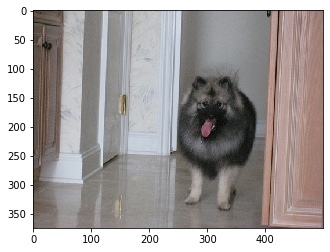

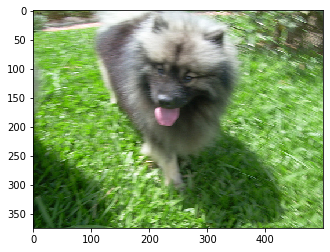

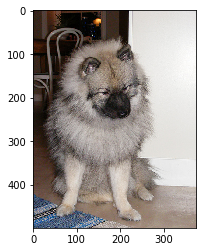

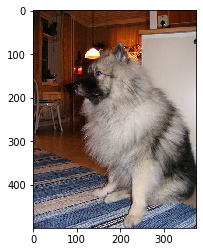

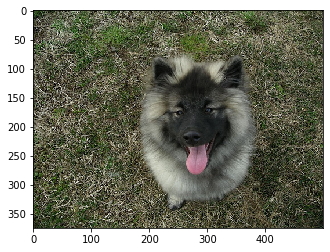

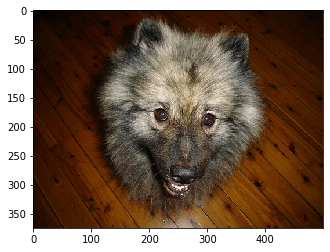

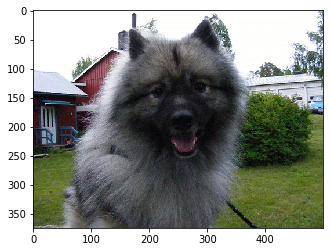

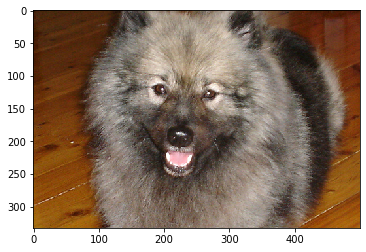

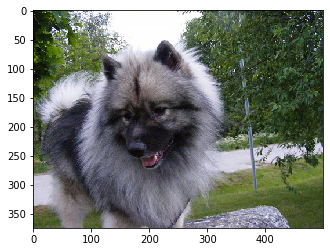

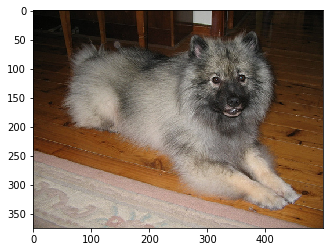

In [39]:
for i in predict[0]:
    print(my_image_path + img_file_list[i])
    print_image(my_image_path + img_file_list[i])

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/app/models/inception-v3/model.ckpt-157585


[사용자가 이미지 검색으로 찾으려는 동물 이미지]


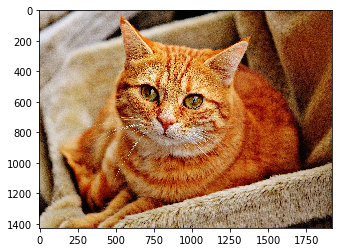

In [41]:
image_path_one = "/content/drive/My Drive/app/pets/cat-1046544_1920.jpg"

logit_one = inference_on_image(image_path_one)

print("\n")
print("[사용자가 이미지 검색으로 찾으려는 동물 이미지]")
print_image(image_path_one)

[사용자가 검색한 이미지로 찾은 동물 이미지들]


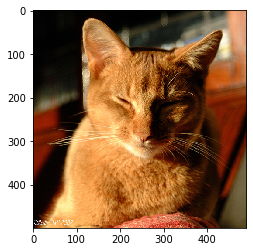

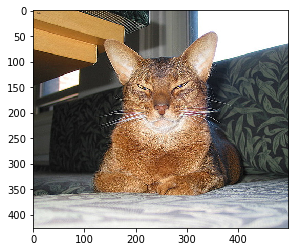

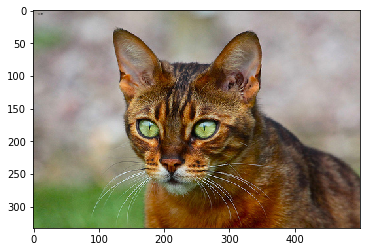

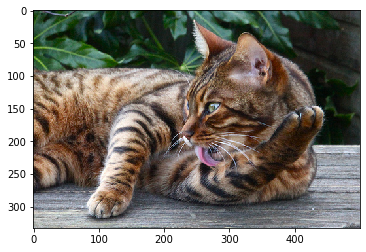

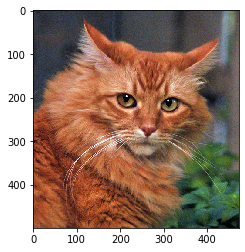

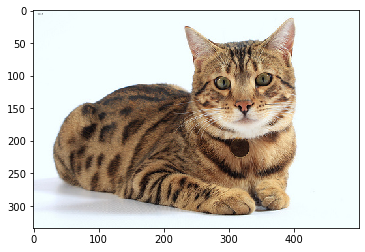

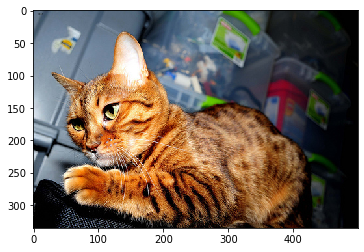

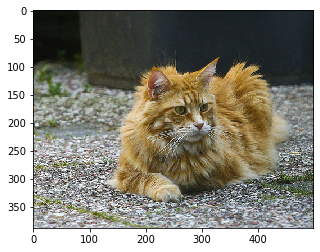

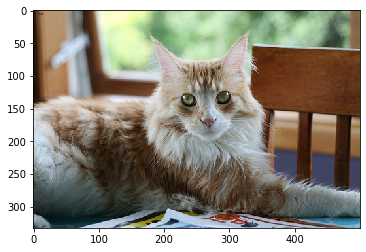

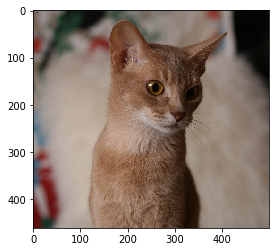

In [43]:
predict_once = knn.kneighbors(logit_one[0], return_distance=False)

print("[사용자가 검색한 이미지로 찾은 동물 이미지들]")
for i in predict_once[0]:
    print_image(my_image_path + img_file_list[i])